## Standardization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
social = pd.read_csv("./Datasets/Social_Network_Ads.csv")
social

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(social.drop('Purchased', axis=1),
                                                   social['Purchased'],
                                                   test_size=0.3,
                                                   random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

## Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [15]:
# converting scaled arrays into dataframe

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [16]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


### Compare mean and sd of scaled train data with old train data

In [22]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [20]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Effects of Scaling

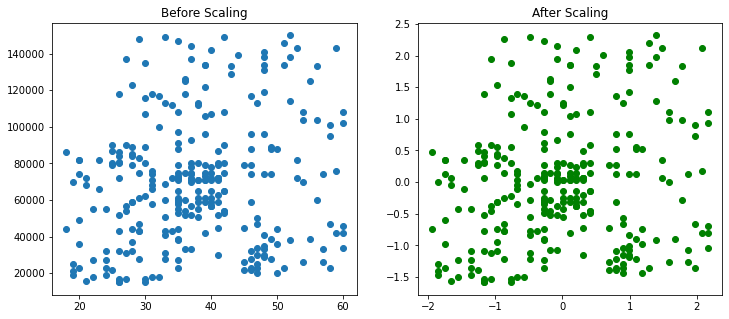

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train["Age"], X_train["EstimatedSalary"])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled["Age"], X_train_scaled["EstimatedSalary"], color='green')
ax2.set_title("After Scaling")
plt.show()

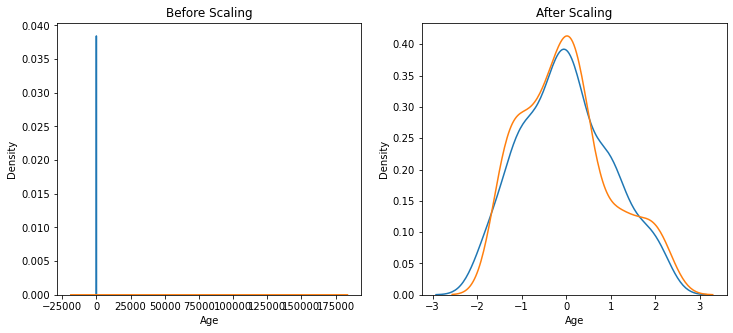

In [43]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scaling
sns.kdeplot(X_train["Age"], ax=ax1)
sns.kdeplot(X_train["EstimatedSalary"], ax=ax1)
ax1.set_title("Before Scaling")

# after scaling
sns.kdeplot(X_train_scaled["Age"], ax=ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=ax2)
ax2.set_title("After Scaling")

plt.show()

## Comparision of Distributions
The distribution remains sam even after scaling

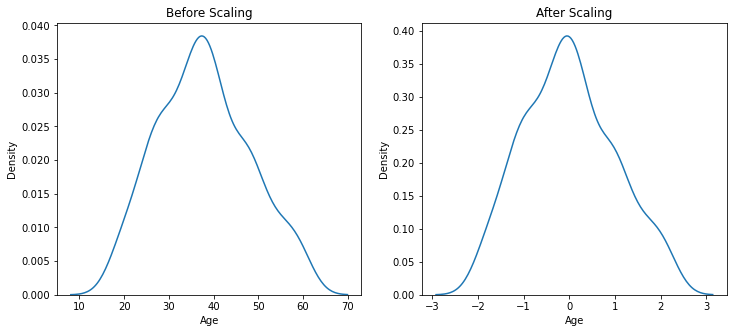

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"], ax=ax1)

# after scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled["Age"], ax=ax2)

plt.show()

## Model fitting to show how scaling gives more aaccurate predictions

In [46]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [48]:
# fitting model
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [49]:
# predicting for test data
y_pred = lr.predict(X_test)
y_scaled_pred = lr_scaled.predict(X_test_scaled)

In [61]:
# checking accuracy of scaled and unscaled data

from sklearn.metrics import accuracy_score

print("Before Scaling: ", accuracy_score(y_test, y_pred))
print("After Scaling:  ", accuracy_score(y_test, y_scaled_pred))

Before Scaling:  0.6583333333333333
After Scaling:   0.8666666666666667
